# EDA na prática! 😎

### **Descrição:**
Agora que você já sabe os básicos do por quê precisamos de dados limpos, bem estruturados e como trabalhar com um conjunto de dados até chegar nessa etapa, que tal testar as nossas novas habilidades em um dataset real? Hoje, o nosso objetivo será limpar e extrair alguns insights do conjunto de dados da tragédia mais esquisita do mundo das navegações, o [Titanic](https://www.kaggle.com/c/titanic/overview)! Esse dataset vai incluir as seguintes informações:

|                Coluna                | Descrição |
|:------------------------------------:|:---------:|
|                  Survived                 |    Sobrevivência ou não (0 - não; 1- sim)       |
|                  Pclass                 |    Tipo de passagem (1a, 2a ou 3a classe)    |
|          SibSp   |    No. de irmãos/cônjuges a bordo do Titanic       |
| Parch |    No. de pais/filhos a bordo do Titanic       |
|      Ticket   |      No. do tíquete    |
|       Fare       |    Tarifa de passageiro       |
|                Cabin               |       Número da cabine    |
|    Embarked  |      Porto de embarcação (C - Cherbourg, Q - Queenstown, S - Southampton)     |


Essa próxima etapa deve deixar algumas pessoas com frio na barriga, mas relaxa que temos tempo mais que suficiente para explorar esses dados.
#### Ps: Esse é muito melhor de entender do que o dos cachorros 😉

### 1.1 - Leitura dos dados e realização de descrição estatística
---

A seguir, o dataframe já estará montado pelo método `pd.read_csv()` da biblioteca `pandas`, a partir da execução da célula.

Dica: Você pode acessar a documentação da biblioteca `pandas` [clicando aqui](https://pandas.pydata.org/docs/getting_started/index.html#getting-started). Após o processamento do dataframe, você terá de realizar uma descrição estatística dos dados.
/
#### Lembrando! A descrição estatística nada mais é do que mostrar como os valores estão distribuídos, então pode usar quaisquer método achar suficiente para fazer isso, e lembrando, **menos e melhor** é a chave para uma boa análise! 😁

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
dataset = pd.read_csv('https://raw.githubusercontent.com/IcaroR/TRILha/main/datasets/Titanic/train.csv', sep = ',')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [134]:
#Descrição estatística:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [135]:
# Insformações gerais sobre o dataset (tipo de dados, valores nao nulos...)
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 1.2 - Limpeza dos dados
---



#### Agora que já conseguimos ter uma visão do panorâmica dos dados, conseguimos ver que eles estão uma porcaria, então que tal dar uma faxina neles? Remova todos os erros, como dados faltantes, colunas com tipos errados, etc. Mais uma vez, a leitura da documentação do `pandas` é imprescindível.

_Sua resposta aqui_

In [136]:
# Limpeza de valores nulos: As colunas Age, Cabin e Embarket possuem valores nulos.
dataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [137]:
dataset_copia = dataset.copy() #criando um dataset_copia para nao modificar diiretamente o dataset


In [138]:
# A coluna Cabin possue muitos valores nulos, optarei por removê-la do dataset.
#removerei a dos nomes tambem, pois eh uma coluna apenas descritiva e que nao vai poder ser usada no oneHotEncoder(utilizado para dados categoricos)
dataset_copia = dataset.drop(['Cabin', 'Name', 'Ticket'], axis=1)


In [139]:
#Removerei as linhas nulas referentes a coluna Age e Embarked
dataset_copia = dataset_copia.dropna()

In [140]:
dataset_copia.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


### 1.3 - Análise Exploratória dos Dados
---

#### Ufa! Finalmente demos uma bela limpada naquela bagunça, agora é hora de **REALMENTE** dar uma olhada no que tá acontecendo aqui. A primeira coisa que vamos fazer é procurar algumas correlações e analizar as distribuições das features que estão presentes nesse dataset. Pra fazer isso, recomendo usar a biblioteca `matplotlib.pyplot` para criar gráficos que representem estas medidas. Agora, se você conhecer alguma outra ferramenta que te ajude aqui, pode ir fundo nela!
Lembrando, use todos os gráficos que achar necessário, mas não precisa exagerar também, beleza?
Ajude seu monitor! 💀

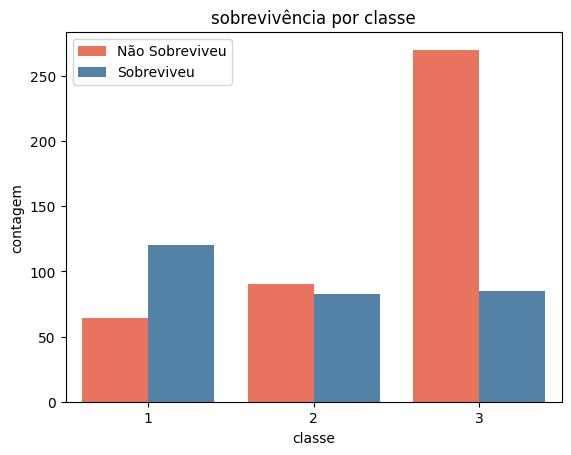

In [141]:
# gráfico de barras para ver a sobrevivência por classe
sns.countplot(data=dataset_copia, x='Pclass', hue='Survived', palette=['#FF6347', '#4682B4'])
plt.title('sobrevivência por classe')
plt.xlabel('classe')
plt.ylabel('contagem')
plt.legend(['Não Sobreviveu', 'Sobreviveu'])
plt.show()

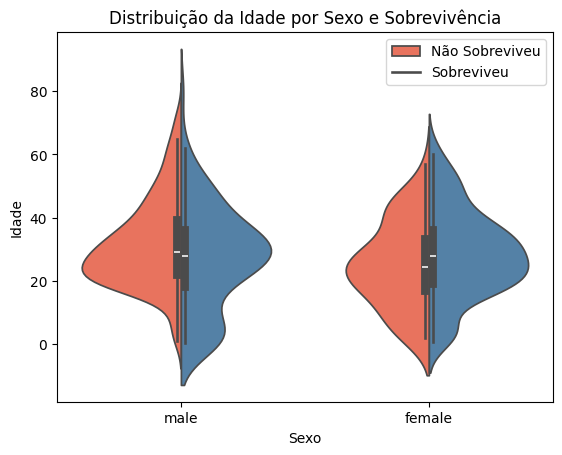

In [142]:
# grafico do tipo violino para mostrar a distribuicao da sobrevivencia por sexo
sns.violinplot(data=dataset_copia, x='Sex', y='Age', hue='Survived', split=True, palette=['#FF6347', '#4682B4'])
plt.title('Distribuição da idade por sexo e sobrevivência')
plt.xlabel('Sexo')
plt.ylabel('Idade')
plt.legend(['Não Sobreviveu', 'Sobreviveu'])
plt.show()


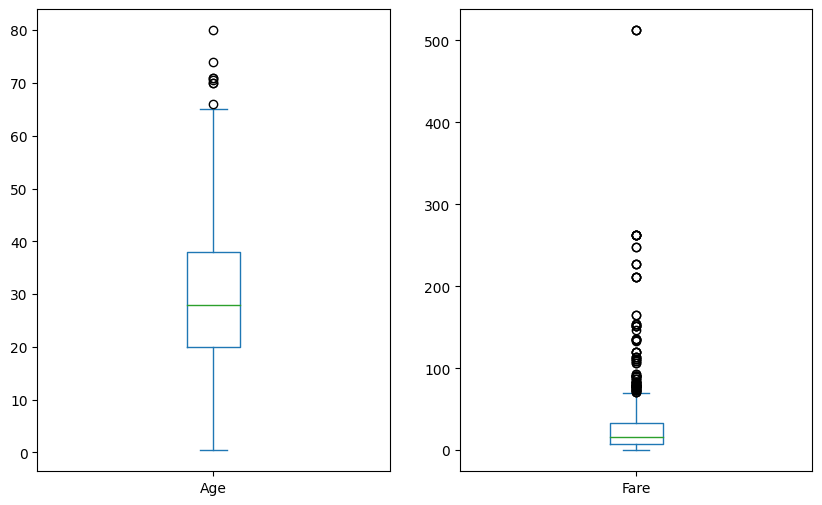

In [143]:
# Plotando boxplots para 'Age' e 'Fare'
dataset_copia[['Age', 'Fare']].plot.box(figsize=(10, 6), subplots=True, layout=(1, 2))
plt.show()


In [144]:
#Aproveitarei para fazer a limpeza dessas duas colunas, removendo os outliers usando o intervalo interquartil dos dados
# calculando os quartis e com isso o IQR
Q1 = dataset_copia['Age'].quantile(0.25)
Q3 = dataset_copia['Age'].quantile(0.75)
IQR = Q3 - Q1

#definindo o limite superior e inferior
lower = Q1 - 1.5 * IQR
upper = Q3+ 1.5 * IQR

#removendo tudo que estiver acima do limite superior e abaixo do limite inferior
dataset_copia = dataset_copia[(dataset_copia['Age'] >= lower) & (dataset_copia['Age'] <= upper)]


<Axes: >

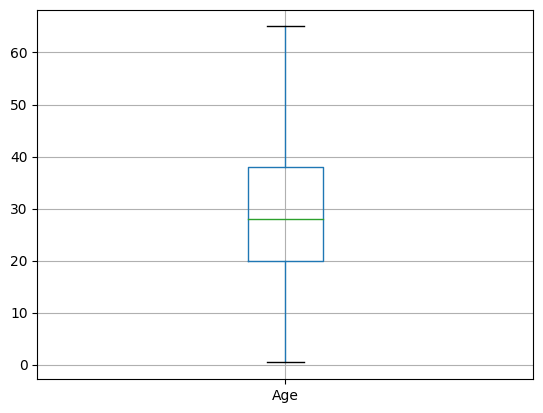

In [145]:
# verificando...limpinho!
dataset_copia.boxplot(column='Age')

In [146]:
# para a coluna 'Fare'
Q1 = dataset_copia['Fare'].quantile(0.25)
Q3 = dataset_copia['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3+ 1.5 * IQR

dataset_copia = dataset_copia[(dataset_copia['Fare'] >= lower) & (dataset_copia['Fare'] <= upper)]


<Axes: >

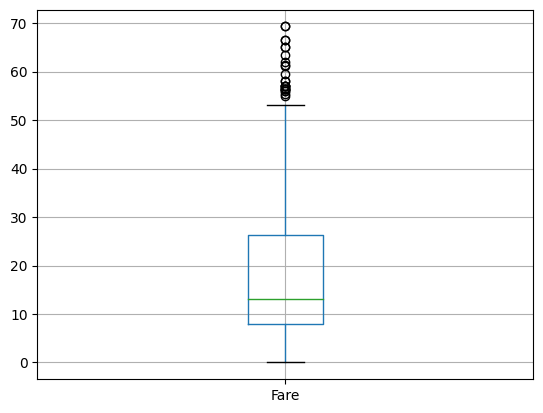

In [147]:
# ainda possue outliers, mas como os valores do Fare variam muito, eh normal (eu acho)
dataset_copia.boxplot(column='Fare')

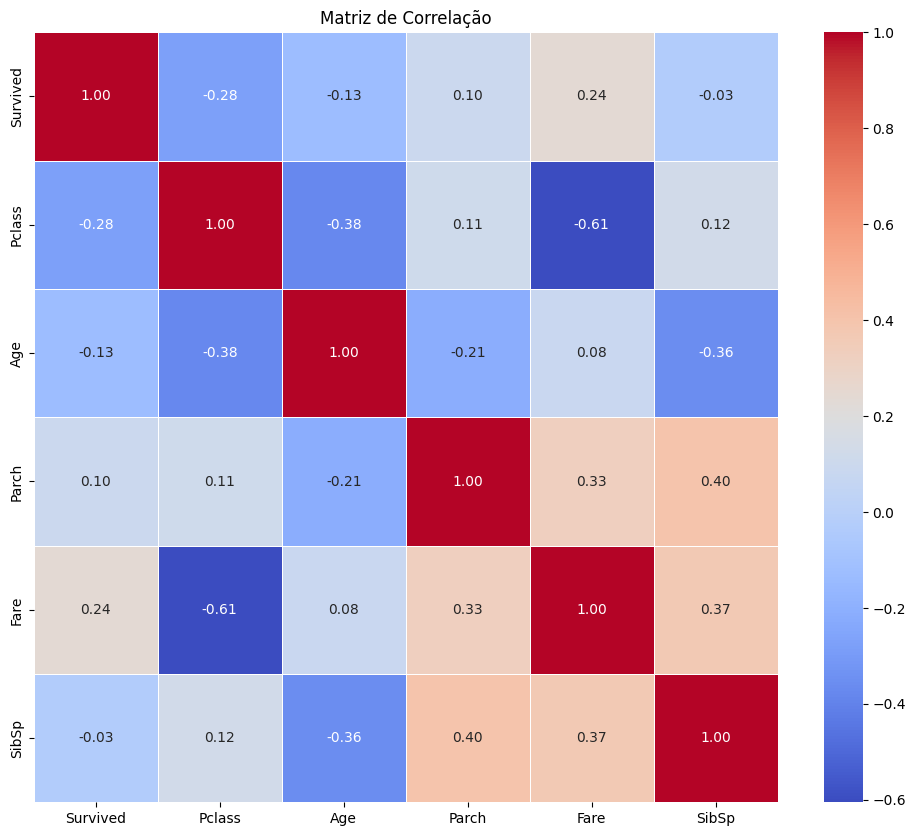

In [148]:
#Construindo uma matriz de correlacao:

columns = [
    'Survived',
    'Pclass',
    'Age',
    'Parch',
    'Fare',
    'SibSp',
]

df = dataset_copia[columns]

# calcula a matriz de correlação
matriz = df.corr()

# plotando o heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()


### 1.4 - Feature Engineering e Dados Categóricos
---

#### 1.4.1 - Sempre que falamos de _Data Science_, já lembramos de tipos diferentes de dados, e com eles, sempre vem os temidos dados categórios. Esse tipo de dados normalmente apresenta uma forma muito diferente de variáveis numéricas, e por consquência, trabalhar com eles tabém exige um cuidado a mais. Por isso, agora vamos transformar alguns desses dados usando os métodos que a gente aprendeu hoje, um deles sendo o OneHotEncoder. Eai, ainda lembra como ele funciona? 🤔

#### Após isso, vamos fazer o _Feature Engineering_! Essa é uma técnica **PODEROSÍSSIMA** que vai ajudar a gente a conseguir algumas outras informações que vimos ser possíveis de extrair no passo `1.3`.
Agora, basta usar sua intuição e criatividade para decidir como novos atributos podem ser definidos, a partir das informações que já temos.

Dica: Use as colunas existentes para gerar uma ou mais colunas com atributos distintos dos primeiros.

In [149]:
#criando uma coluna para o "tamanho da familia"
dataset_copia.loc[:, 'FamilySize'] = dataset_copia['SibSp'] + dataset_copia['Parch'] + 1


In [150]:
# uma coluna que mostra se o passageiro estava sozinho (sem a familia)
dataset_copia['IsAlone'] = (dataset_copia['FamilySize'] == 1).astype(int)


In [151]:
# coluna que categoriza a tarifa em baixa, media, alta e muito alta
dataset_copia['FareCategory'] = pd.qcut(dataset_copia['Fare'], 4, labels=[0, 1, 2, 3]).astype(int)


In [152]:
#coluna para categorizar a idade em criança, adulto e idoso
dataset_copia['AgeCategory'] = pd.cut(dataset_copia['Age'], bins=[0, 12, 18, 100], labels=[0, 1, 2]).astype(int)


In [153]:
dataset_copia

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,FareCategory,AgeCategory
0,1,0,3,male,22.0,1,0,7.2500,S,2,0,0,2
2,3,1,3,female,26.0,0,0,7.9250,S,1,1,0,2
3,4,1,1,female,35.0,1,0,53.1000,S,2,0,3,2
4,5,0,3,male,35.0,0,0,8.0500,S,1,1,1,2
6,7,0,1,male,54.0,0,0,51.8625,S,1,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,Q,6,0,3,2
886,887,0,2,male,27.0,0,0,13.0000,S,1,1,1,2
887,888,1,1,female,19.0,0,0,30.0000,S,1,1,3,2
889,890,1,1,male,26.0,0,0,30.0000,C,1,1,3,2


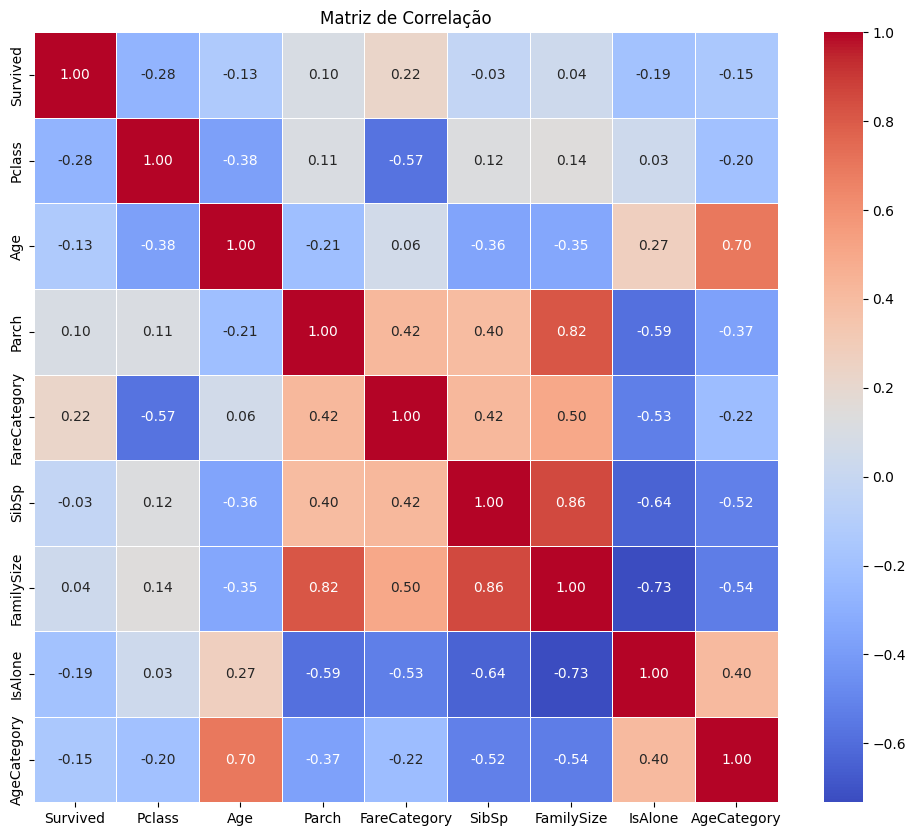

In [154]:
#Construindo uma matriz de correlacao incluindo as novas colunas
import matplotlib.pyplot as plt
import seaborn as sns
columns = [
    'Survived',
    'Pclass',
    'Age',
    'Parch',
    'FareCategory',
    'SibSp',
    'FamilySize',
    'IsAlone',
    'AgeCategory',
]

df = dataset_copia[columns]

# calcula a matriz de correlação
matriz = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()


1.4.2 - Em poucos termos, computadores não conseguem entender texto de maneira alguma, mas números, ah, esses as máquinas entendem bem pra caramba!
Então, que tal usar as técnicas que aprendemos pra deixar tudo necessário em números?

Dica: Sempre que temos uma feature categórica que possui apenas 2 elementos, podemos transformar ela em uma flag binária!
Agora o que isso significa eu deixo pra você pesquisar 😉

In [155]:
categorical_columns = ['Pclass', 'Sex', 'Embarked',] #aplicando o OneHotEncoder nas colunas categoricas

dataset_copia_encoded = pd.get_dummies(dataset_copia, columns=categorical_columns, drop_first=True)


In [156]:
dataset_copia_encoded

,PassengerId,Survived,Age,SibSp,Parch,Fare,FamilySize,IsAlone,FareCategory,AgeCategory,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,2,0,0,2,False,True,True,False,True
2,3,1,26.0,0,0,7.9250,1,1,0,2,False,True,False,False,True
3,4,1,35.0,1,0,53.1000,2,0,3,2,False,False,False,False,True
4,5,0,35.0,0,0,8.0500,1,1,1,2,False,True,True,False,True
6,7,0,54.0,0,0,51.8625,1,1,3,2,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,39.0,0,5,29.1250,6,0,3,2,False,True,False,True,False
886,887,0,27.0,0,0,13.0000,1,1,1,2,True,False,True,False,True
887,888,1,19.0,0,0,30.0000,1,1,3,2,False,False,False,False,True
889,890,1,26.0,0,0,30.0000,1,1,3,2,False,False,True,False,False
